# Predicting a football match winner 
(Multiclass classification problem)

Importing libraries

In [340]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Writing paths and variables

In [341]:
data_path = "Botola_Forecasting/"

data_matches = "morocco-botola-pro-matches"
data_teams = "morocco-botola-pro-teams"

data_years = [2014,2015,2016,2017,2018,2019,2020]


Selecting years of data

In [342]:
data_matches_selected = []

for filename in os.listdir(data_path):
    file_path = data_path + filename
    if data_matches in filename:
        if filename[-14:-10] in str(data_years):
            df = pd.read_csv(file_path)
            df['season'] = filename[-14:-10] # adding season to each df
            data_matches_selected.append(df)


In [343]:
data_teams_selected = []

for filename in os.listdir(data_path):
    file_path = data_path + filename
    if data_teams in filename:
        if filename[-14:-10] in str(data_years):
            df = pd.read_csv(file_path)
            data_teams_selected.append(df)

Concatenate data over years

In [344]:
data_matches = pd.concat(data_matches_selected)
data_matches.date_GMT = pd.to_datetime(data_matches.date_GMT,format='%b %d %Y - %I:%M%p',errors='coerce')
data_matches = data_matches.reset_index()


In [345]:
data_teams = pd.concat(data_teams_selected)
data_matches.head()

,index,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,season
0,0,1377280800,2013-08-23 18:00:00,complete,NaN,FAR Rabat,FUS Rabat,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Prince Moulay Abdallah,2014
1,1,1377360000,2013-08-24 16:00:00,complete,NaN,AS Salé,Hassania Agadir,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Boubker Ammar,2014
2,2,1377446400,2013-08-25 16:00:00,complete,NaN,RSB Berkane,Moghreb Tétouan,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade d'Honneur d'Oujda,2014
3,3,1377453600,2013-08-25 18:00:00,complete,NaN,Raja Casablanca,Olympic Safi,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Mohamed V,2014
4,4,1377460800,2013-08-25 20:00:00,complete,NaN,Chabab Rif Hoceima,Maghreb Fès,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Mimoun Al Arsi,2014


In [346]:
data_teams.head()

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
0,Wydad Athletic Club,Wydad Casablanca,2013/2014,Morocco,30,15,15,0,10,7,...,0,0,0,0,0,0,0,0,0,0
1,Hassania Union Sport d'Agadir,Hassania Agadir,2013/2014,Morocco,30,15,15,0,10,9,...,0,0,0,0,0,0,0,0,0,0
2,AS Forces Armées Royales de Rabat,FAR Rabat,2013/2014,Morocco,30,15,15,0,9,5,...,0,0,0,0,0,0,0,0,0,0
3,Olympique Club de Khouribga,Khouribga,2013/2014,Morocco,30,15,15,0,8,6,...,0,0,0,0,0,0,0,0,0,0
4,Olympique Club de Safi,Olympic Safi,2013/2014,Morocco,30,15,15,0,7,6,...,0,0,0,0,0,0,0,0,0,0


Merge matches and teams dataframes

In [347]:
data_teams.season = data_teams.season.apply(lambda x: x[-4:]) # matching saeson formats

In [348]:
data_matches.columns

Index(['index', 'timestamp', 'date_GMT', 'status', 'attendance',
       'home_team_name', 'away_team_name', 'referee', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_p

In [349]:
matches_columns = ['date_GMT', 'season', 'status', 'home_team_name', 'away_team_name','home_team_goal_count','away_team_goal_count','average_goals_per_match_pre_match','average_cards_per_match_pre_match', 'stadium_name']
data_matches = data_matches[matches_columns]

In [350]:
data_teams.columns

Index(['team_name', 'common_name', 'season', 'country', 'matches_played',
       'matches_played_home', 'matches_played_away', 'suspended_matches',
       'wins', 'wins_home',
       ...
       'goals_scored_min_81_to_90', 'goals_conceded_min_0_to_10',
       'goals_conceded_min_11_to_20', 'goals_conceded_min_21_to_30',
       'goals_conceded_min_31_to_40', 'goals_conceded_min_41_to_50',
       'goals_conceded_min_51_to_60', 'goals_conceded_min_61_to_70',
       'goals_conceded_min_71_to_80', 'goals_conceded_min_81_to_90'],
      dtype='object', length=280)

In [351]:
teams_columns =[
 'average_possession',
 'clean_sheet_percentage',
 'common_name',
 'draw_at_half_time',
 'draws',
 'draws_away',
 'draws_home',
 'goals_conceded_per_match_half_time_away',
 'goals_scored',
 'goals_scored_per_match',
 'home_advantage_percentage',
 'leading_at_half_time_away',
 'leading_at_half_time_percentage',
 'losing_at_half_time_percentage',
 'losses_away',
 'points_per_game',
 'season',
 'shots_on_target',
 'win_percentage_away',
 'wins_away']

data_teams = data_teams[teams_columns]

In [352]:
data = pd.merge(data_matches, data_teams,  how='left', left_on=['season','home_team_name'], right_on = ['season','common_name'])
data = pd.merge(data, data_teams, suffixes = ('_home', '_away'), how='left', left_on=['season','away_team_name'], right_on = ['season','common_name'])
data


,date_GMT,season,status,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,average_goals_per_match_pre_match,average_cards_per_match_pre_match,stadium_name,...,goals_scored_per_match_away,home_advantage_percentage_away,leading_at_half_time_away_away,leading_at_half_time_percentage_away,losing_at_half_time_percentage_away,losses_away_away,points_per_game_away,shots_on_target_away,win_percentage_away_away,wins_away_away
0,2013-08-23 18:00:00,2014,complete,FAR Rabat,FUS Rabat,0,1,0.00,0.00,Stade Prince Moulay Abdallah,...,1.07,13,0,0,0,5,1.60,136,33,5
1,2013-08-24 16:00:00,2014,complete,AS Salé,Hassania Agadir,2,2,0.00,0.00,Stade Boubker Ammar,...,1.20,23,0,0,0,8,1.27,131,7,1
2,2013-08-25 16:00:00,2014,complete,RSB Berkane,Moghreb Tétouan,0,1,0.00,0.00,Stade d'Honneur d'Oujda,...,1.20,23,0,0,0,4,1.93,162,47,7
3,2013-08-25 18:00:00,2014,complete,Raja Casablanca,Olympic Safi,1,1,0.00,0.00,Stade Mohamed V,...,0.93,14,0,0,0,7,1.10,90,7,1
4,2013-08-25 20:00:00,2014,complete,Chabab Rif Hoceima,Maghreb Fès,1,2,0.00,0.00,Stade Mimoun Al Arsi,...,0.90,9,0,0,0,8,1.03,145,20,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2020-09-26 19:00:00,2020,incomplete,Hassania Agadir,FUS Rabat,0,0,2.09,5.12,NaN,...,1.09,6,0,0,0,3,1.57,89,23,3
1676,2020-09-27 17:00:00,2020,incomplete,CR Khemis Zemamra,Mouloudia Oujda,0,0,2.50,5.14,NaN,...,1.24,10,0,0,0,2,1.64,101,17,2
1677,2020-09-27 19:00:00,2020,incomplete,Raja Casablanca,Rapide Oued Zem,0,0,1.80,4.42,NaN,...,0.83,20,0,0,0,7,1.13,63,17,2
1678,2020-09-27 19:00:00,2020,incomplete,Raja Beni Mellal,RSB Berkane,0,0,1.55,5.12,NaN,...,1.00,14,0,0,0,1,1.82,70,40,4


In [353]:
data.columns

Index(['date_GMT', 'season', 'status', 'home_team_name', 'away_team_name',
       'home_team_goal_count', 'away_team_goal_count',
       'average_goals_per_match_pre_match',
       'average_cards_per_match_pre_match', 'stadium_name',
       'average_possession_home', 'clean_sheet_percentage_home',
       'common_name_home', 'draw_at_half_time_home', 'draws_home',
       'draws_away_home', 'draws_home_home',
       'goals_conceded_per_match_half_time_away_home', 'goals_scored_home',
       'goals_scored_per_match_home', 'home_advantage_percentage_home',
       'leading_at_half_time_away_home',
       'leading_at_half_time_percentage_home',
       'losing_at_half_time_percentage_home', 'losses_away_home',
       'points_per_game_home', 'shots_on_target_home',
       'win_percentage_away_home', 'wins_away_home', 'average_possession_away',
       'clean_sheet_percentage_away', 'common_name_away',
       'draw_at_half_time_away', 'draws_away', 'draws_away_away',
       'draws_home_away', 'g

Different teams that played in the selected years

In [354]:
teams = data_teams.common_name.unique()
print("{} team played in 1st div in {}".format(len(teams),list(data_years)))
for team in teams:
    print("-> ",team)

26 team played in 1st div in [2014, 2015, 2016, 2017, 2018, 2019, 2020]
->  Wydad Casablanca
->  Hassania Agadir
->  FAR Rabat
->  Khouribga
->  Olympic Safi
->  Raja Casablanca
->  Kawkab Marrakech
->  Difaâ El Jadida
->  Moghreb Tétouan
->  RSB Berkane
->  Chabab Rif Hoceima
->  FUS Rabat
->  KAC Kénitra
->  Maghreb Fès
->  AS Salé
->  Wydad Fès
->  Chabab Atlas Khénifra
->  Ittihad Khemisset
->  Ittihad Tanger
->  Mouloudia Oujda
->  Kasba Tadla
->  Racing de Casablanca
->  Rapide Oued Zem
->  Youssoufia Berrechid
->  Raja Beni Mellal
->  CR Khemis Zemamra


Teams with most home wins sorted

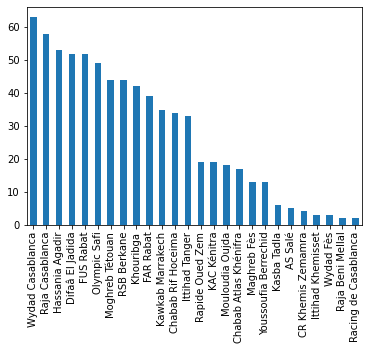

In [355]:
data[ (data.home_team_goal_count > data.away_team_goal_count) ].home_team_name.value_counts().plot.bar()

Teams with most away wins sorted

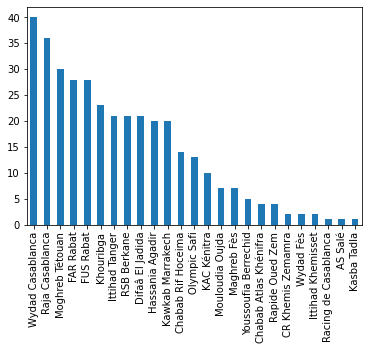

In [356]:
data[ (data.home_team_goal_count < data.away_team_goal_count) ].away_team_name.value_counts().plot.bar()

Adding useful features

In [357]:
# Final result feature

def result(row):
    if row.home_team_goal_count > row.away_team_goal_count:
        return 1
    elif row.home_team_goal_count < row.away_team_goal_count:
        return 2
    else:
        return 0

# Count of wins of the home team against the away team

def away_wins_vs(row):
    return len(  data[  ( (data.result == 1) & (data.home_team_name == row.away_team_name) & (data.away_team_name == row.home_team_name)  ) 
                | ((data.result == 2) & (data.home_team_name == row.home_team_name) & (data.away_team_name == row.away_team_name)) ] )

# Count of wins of the away team against the home team

def home_wins_vs(row):
    return len(  data[  ( (data.result == 1) & (data.home_team_name == row.home_team_name) & (data.away_team_name == row.away_team_name)  ) 
                | ((data.result == 2) & (data.home_team_name == row.away_team_name) & (data.away_team_name == row.home_team_name)) ] )

# Count of wins in n last matches ( n=0 : all matches )

def last_matches_wins(date,team,n):
    df = data[ ((data.home_team_name == team) | (data.away_team_name == team)) & (data.date_GMT < date) & (data.status == 'complete') ][-n:]
    return len( df[ (df.home_team_name == team) & (df.result == 1) ] ) + len( df[ (df.away_team_name == team) & (df.result == 2) ] ) 
    
# Count of draws the playing teams

def draws_vs(row):
        return len( data[(data.result==0) & ((data.home_team_name==row.home_team_name) & (data.away_team_name==row.away_team_name))])+len( data[(data.result==0) & ((data.home_team_name==row.away_team_name) & (data.away_team_name==data.home_team_name))])


data['result'] = data.apply(result,axis=1)
data['home_wins_vs'] = data.apply(home_wins_vs,axis=1)
data['away_wins_vs'] = data.apply(away_wins_vs,axis=1)
data['draws_vs']=data.apply(draws_vs,axis=1)


In [358]:
last_matches_wins('2020-12-12 17:30:00','Raja Casablanca',5)


3

In [359]:
data['home_last_5'] = 0
data['away_last_5'] = 0
for i in range(len(data)):
    h = last_matches_wins(data.iloc[i].date_GMT,data.iloc[i].home_team_name,10)
    a = last_matches_wins(data.iloc[i].date_GMT,data.iloc[i].away_team_name,10)
    data.at[i,'home_last_5'] = h
    data.at[i,'away_last_5'] = a

In [360]:
data['home_last_all'] = 0
data['away_last_all'] = 0
for i in range(len(data)):
    h = last_matches_wins(data.iloc[i].date_GMT,data.iloc[i].home_team_name,0)
    a = last_matches_wins(data.iloc[i].date_GMT,data.iloc[i].away_team_name,0)
    data.at[i,'home_last_all'] = h
    data.at[i,'away_last_all'] = a

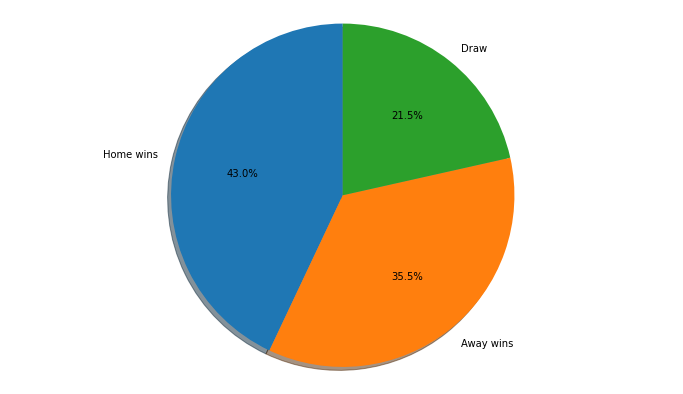

1    722
0    597
2    361
Name: result, dtype: int64

In [361]:
labels = 'Home wins', 'Away wins', 'Draw'


plt.figure(figsize=(12,7))
plt.pie(data.result.value_counts(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

data.result.value_counts()

In [362]:
learning_columns = [
'average_cards_per_match_pre_match',
 'average_goals_per_match_pre_match',
 'average_possession_away',
 'average_possession_home',
 'away_last_5',
 'away_last_all',
 'away_last_all',
 'away_wins_vs',
 'clean_sheet_percentage_away',
 'clean_sheet_percentage_home',
 'draw_at_half_time_away',
 'draw_at_half_time_home',
 'draws_away',
 'draws_away_away',
 'draws_away_home',
 'draws_home',
 'draws_home_away',
 'draws_home_home',
 'draws_vs',
 'goals_conceded_per_match_half_time_away_away',
 'goals_conceded_per_match_half_time_away_home',
 'goals_scored_away',
 'goals_scored_home',
 'goals_scored_per_match_away',
 'goals_scored_per_match_home',
 'home_advantage_percentage_away',
 'home_advantage_percentage_home',
 'home_last_5',
 'home_last_all',
 'home_wins_vs',
 'leading_at_half_time_away_away',
 'leading_at_half_time_away_home',
 'leading_at_half_time_percentage_away',
 'leading_at_half_time_percentage_home',
 'losing_at_half_time_percentage_away',
 'losing_at_half_time_percentage_home',
 'losses_away_away',
 'losses_away_home',
 'points_per_game_away',
 'points_per_game_home',
 'shots_on_target_away',
 'shots_on_target_home',
 'win_percentage_away_away',
 'win_percentage_away_home',
 'wins_away_away',
 'wins_away_home',
 'result',
]

len(learning_columns)

data_learning = data[data.status == 'complete']
data_learning = data_learning[learning_columns]

data_learning = data_learning.dropna()

X = data_learning.drop(['result'],1)
y = data_learning.result

X.head()



,average_cards_per_match_pre_match,average_goals_per_match_pre_match,average_possession_away,average_possession_home,away_last_5,away_last_all,away_last_all,away_wins_vs,clean_sheet_percentage_away,clean_sheet_percentage_home,...,losses_away_away,losses_away_home,points_per_game_away,points_per_game_home,shots_on_target_away,shots_on_target_home,win_percentage_away_away,win_percentage_away_home,wins_away_away,wins_away_home
0,0.0,0.0,48,52,0,0,0,5,47,27,...,5,5,1.60,1.30,136,169,33,27,5,4
1,0.0,0.0,50,46,0,0,0,1,20,30,...,8,9,1.27,0.97,131,156,7,7,1,1
2,0.0,0.0,56,50,0,0,0,8,40,50,...,4,5,1.93,1.17,162,99,47,20,7,3
3,0.0,0.0,48,55,0,0,0,3,27,50,...,7,7,1.10,1.83,90,134,7,33,1,5
4,0.0,0.0,52,51,0,0,0,4,20,27,...,8,9,1.03,1.20,145,97,20,20,3,3


In [363]:
X.shape

(1630, 46)

In [364]:

from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 56,
                                                    stratify = y)

from sklearn import tree

clf_decision_tree = tree.DecisionTreeClassifier(max_depth= 5)

clf_decision_tree.fit(X_train, y_train)

y_pred = clf_decision_tree.predict(X_test)

# ACCURACY

accuracy = sum ( y_pred == y_test) / len(y_test)
print("Test accuracy : ",accuracy)

Test accuracy :  0.6349693251533742


In [365]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# CLASSIFICATION REPORT

''' 
precision: ration of true positives
'''

print('\n'+classification_report(y_test, y_pred, target_names=['draw','home','away']))






              precision    recall  f1-score   support

        draw       0.71      0.50      0.58       109
        home       0.66      0.80      0.72       145
        away       0.51      0.51      0.51        72

    accuracy                           0.63       326
   macro avg       0.62      0.60      0.60       326
weighted avg       0.64      0.63      0.63       326



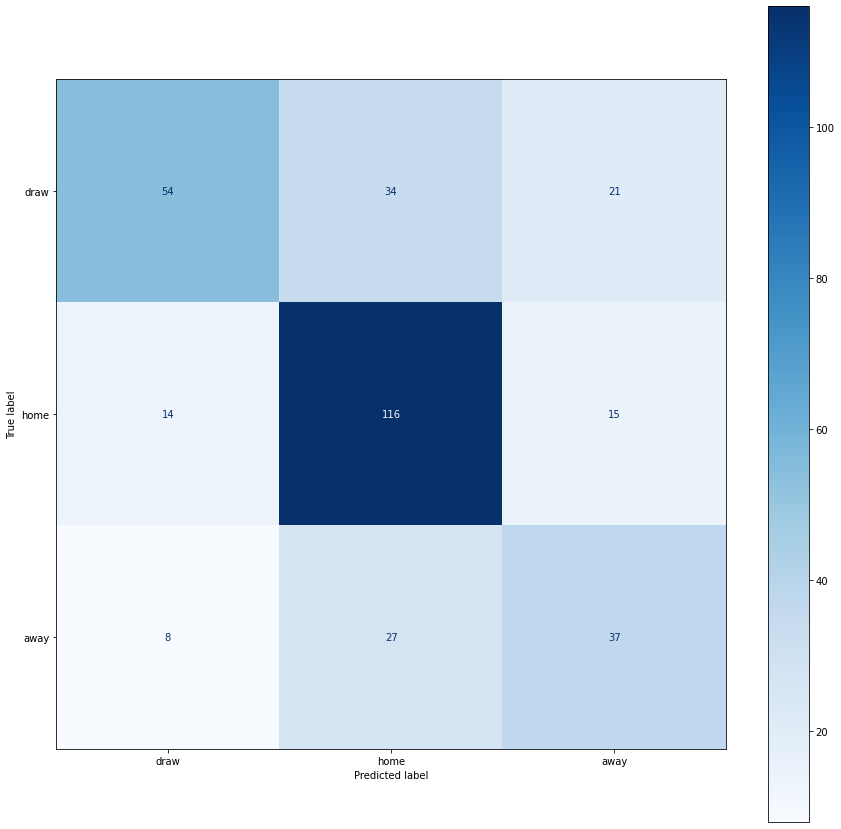

In [366]:
# CONFUSION MATRIX

from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(clf_decision_tree, X_test, y_test,
                                 display_labels=['draw','home','away'],
                                 cmap=plt.cm.Blues,
                                 ax=ax)

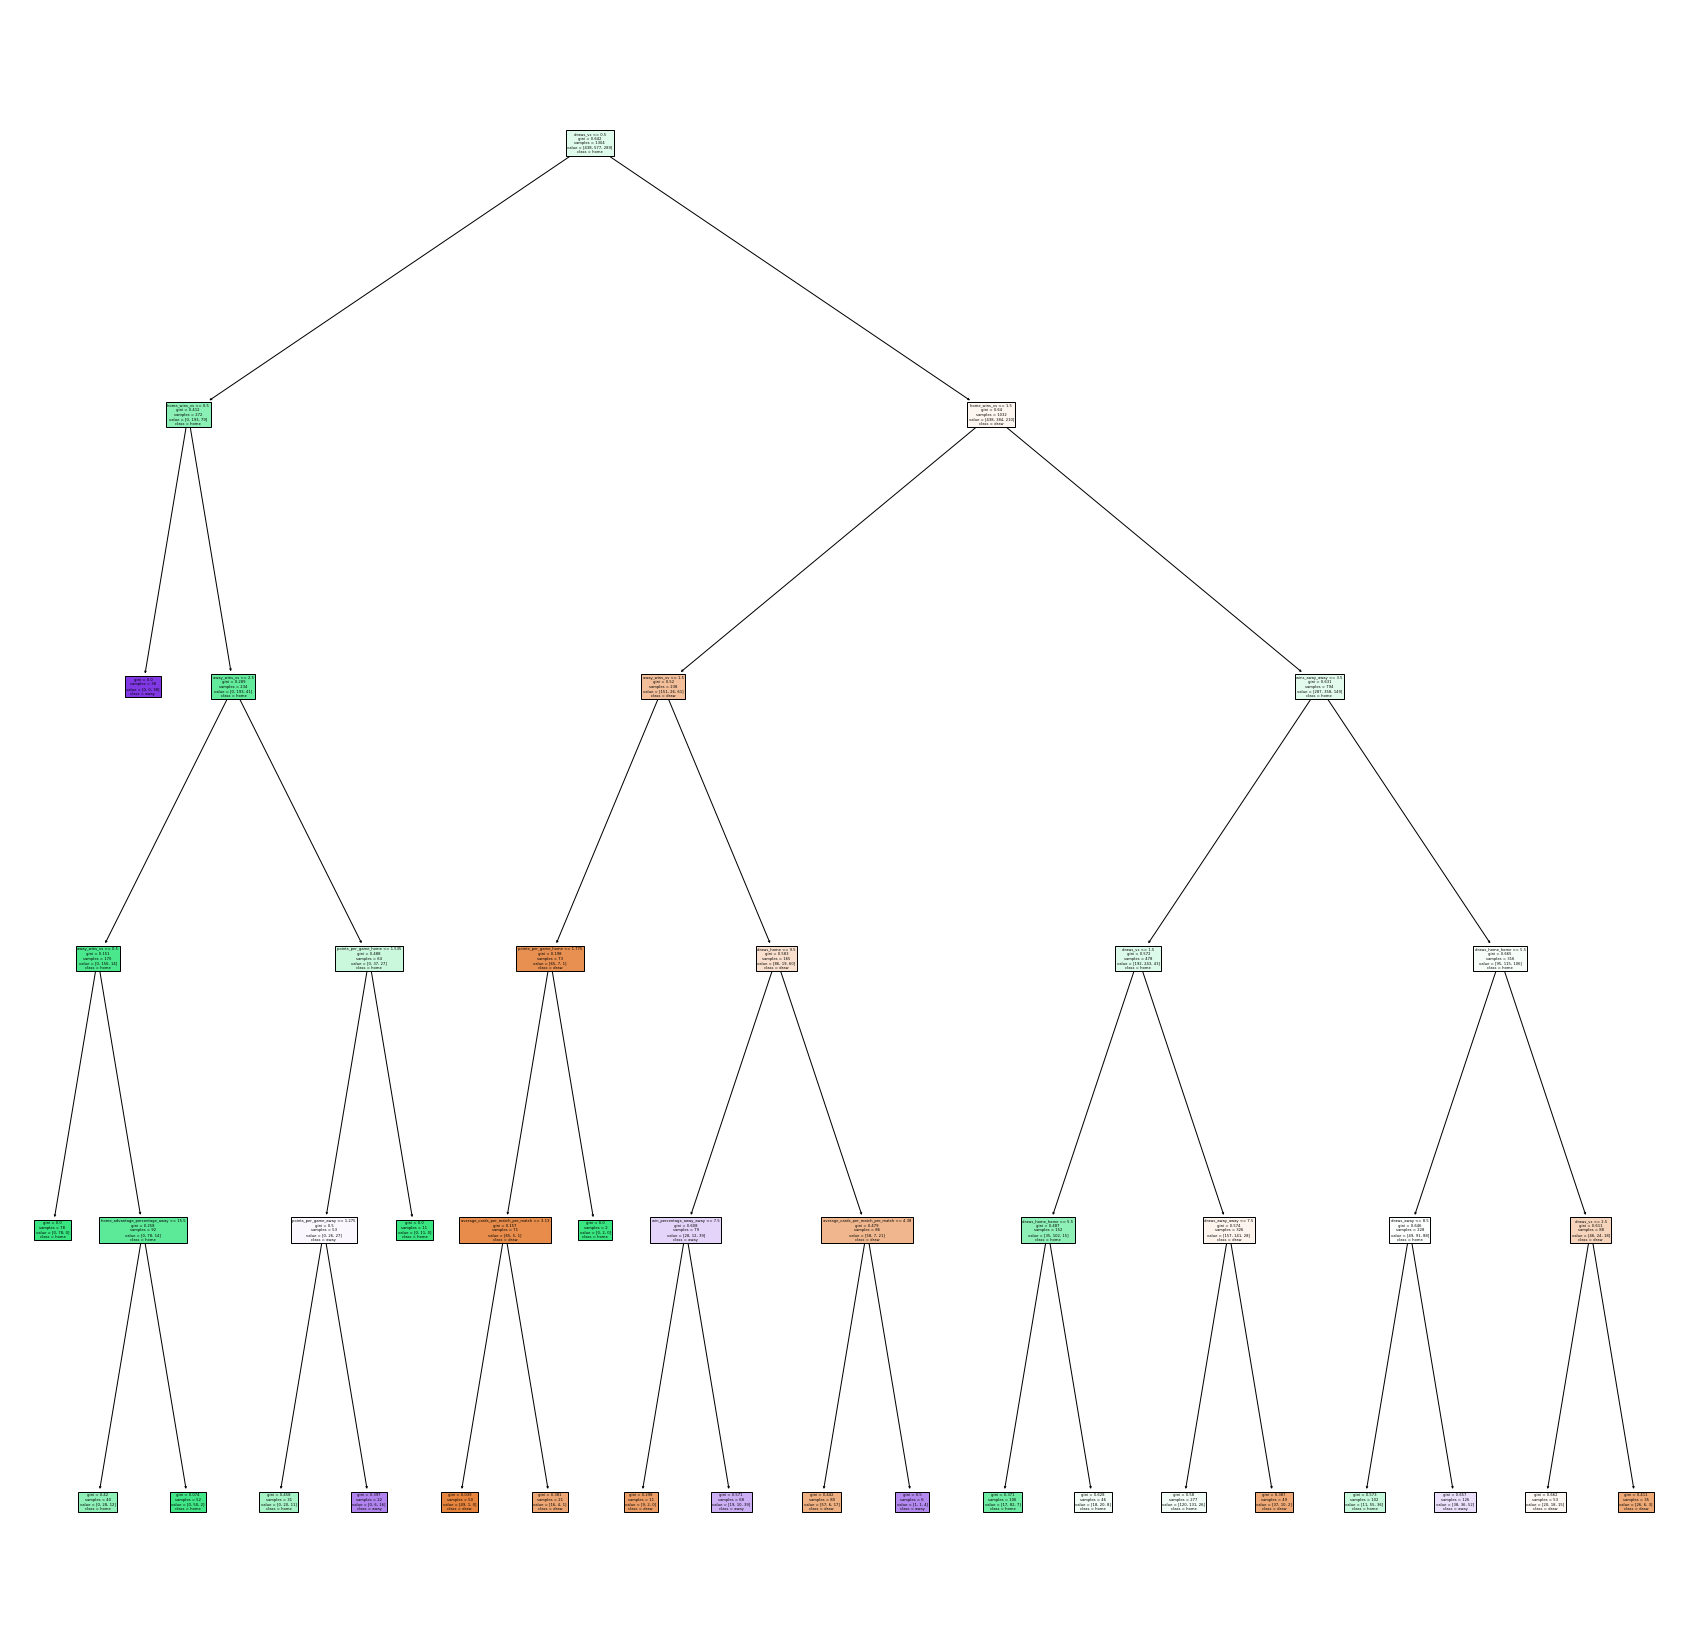

In [367]:

# DECISION TREE PLOT

fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(clf_decision_tree, 
                feature_names=X.columns,  
                class_names=['draw','home','away'],
                filled=True)